<a href="https://colab.research.google.com/github/gargi510/Ivy-League-Admission-Predictor/blob/main/Jamboree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Jamboree

Jamboree is a leading test preparation and admissions counseling company that has helped thousands of students gain admission to top global universities, including Ivy League schools. It offers expert guidance for exams such as GMAT, GRE, and SAT, using unique problem-solving strategies to maximize results efficiently.

Recently, Jamboree launched an online tool that estimates admission chances to Ivy League colleges from the perspective of Indian applicants. This feature provides realistic predictions based on academic and extracurricular profiles.


# Problem Statement

Jamboree seeks to improve its Ivy League admission probability tool by identifying key applicant factors and their interactions—for example, whether strong research experience can offset a lower GRE score. Using historical data, the objective is to develop accurate machine learning models to better predict admission chances for Indian applicants.

# Project Goals

This project aims to:

1. Identify key features influencing admission outcomes to Ivy League graduate programs.
2. Explore relationships among variables using correlation and clustering.
3. Build predictive models estimating admission chances based on student profiles.
4. Provide data-driven recommendations to help applicants improve their chances.


# Column Profiling

The dataset includes the following features:

| Column Name                | Description                                                      |
|----------------------------|------------------------------------------------------------------|
| Serial No.                 | Unique identifier for each applicant                             |
| GRE Score (out of 340)     | Graduate Record Examination score                                |
| TOEFL Score (out of 120)   | Test of English as a Foreign Language score                      |
| University Rating (1 to 5) | Subjective rating of the university                              |
| SOP & LOR Strength (1 to 5)| Combined strength of Statement of Purpose and Letter of Recommendation |
| Undergraduate GPA (out of 10) | Applicant’s undergraduate Grade Point Average                  |
| Research Experience (0 or 1) | Whether the applicant has prior research experience (1 = Yes)  |
| Chance of Admit (0 to 1)   | Estimated probability of admission                               |


We use **Chance of Admit** as the dependent variable and predict it using all other features. This helps estimate a student's admission probability based on their profile.

A regression equation will be developed and optimized to achieve the best possible prediction accuracy.

Linear regression is chosen for its simplicity in modeling relationships between continuous variables and for its interpretability, enabling insight into each feature's impact on admission chances.


# Loading and Inspecting Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import shapiro, probplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


url = "Jamboree_Admission.csv"
df = pd.read_csv(url)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Checking the shape of the data

In [ ]:
df.shape

(500, 9)

Data had 500 records and 9 fields.

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

The Serial number column is redundant for analysis and we will drop it. Also the column names have spaces which will name analysis difficult hence we will rename them.

Dropping serial number so that model does not build some understanding based on row numbers

In [ ]:
df.drop(columns=['Serial No.'], inplace=True)

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Renaming the columns

In [ ]:
df.columns = [
     "GRE", "TOEFL", "UnivRating", "SOP", "LOR", "GPA", "Research", "AdmitChance"
]

In [ ]:
df.dtypes

,0
GRE,int64
TOEFL,int64
UnivRating,int64
SOP,float64
LOR,float64
GPA,float64
Research,int64
AdmitChance,float64


There are 8 columns now, 4 of which have a float datatype

Checking for missing values and duplicates

In [ ]:
print(df.isnull().sum())

print("Duplicate Rows: ", df.duplicated().sum())

GRE            0
TOEFL          0
UnivRating     0
SOP            0
LOR            0
GPA            0
Research       0
AdmitChance    0
dtype: int64
Duplicate Rows:  0


No missing values and duplictes in data hence imputation or handling is not required

# Statistical summary

## Non Graphical analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GRE          500 non-null    int64  
 1   TOEFL        500 non-null    int64  
 2   UnivRating   500 non-null    int64  
 3   SOP          500 non-null    float64
 4   LOR          500 non-null    float64
 5   GPA          500 non-null    float64
 6   Research     500 non-null    int64  
 7   AdmitChance  500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


The dataset contains 500 entries and 8 columns, with no missing values in any column.  
Data types are a mix of integers (GRE, TOEFL, UnivRating, Research) and floats (SOP, LOR, GPA, AdmitChance).  
The data size is manageable (about 31.4 KB), suitable for quick exploratory analysis and modeling.  
All columns are complete, so no imputation is required at this stage.

In [ ]:
df.describe()

,GRE,TOEFL,UnivRating,SOP,LOR,GPA,Research,AdmitChance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**UnivRating** is a categorical ordinal variable ranging from 1 to 5, representing university rank. Since the order is meaningful, no encoding is needed.  
**Research** is a binary categorical variable (0 or 1), so encoding is also unnecessary.

**Summary Insights:**  
- GRE scores range from 290 to 340, with an average of 316.  
- TOEFL scores range from 92 to 120, averaging 107.  
- SOP scores range from 1 to 5, average 3.37, slightly skewed.  
- LOR scores range from 1 to 5, average 3.48, also slightly skewed.  
- GPA ranges from 6.8 to 9, averaging 8.57, leaning towards the higher side.

There is a noticeable difference in the scales of these variables (e.g., GRE: 290–340 vs Research: 0 or 1), so scaling is required to bring them to a comparable range.


## Graphical Analysis

### Univariate

#### Univariate - Continous

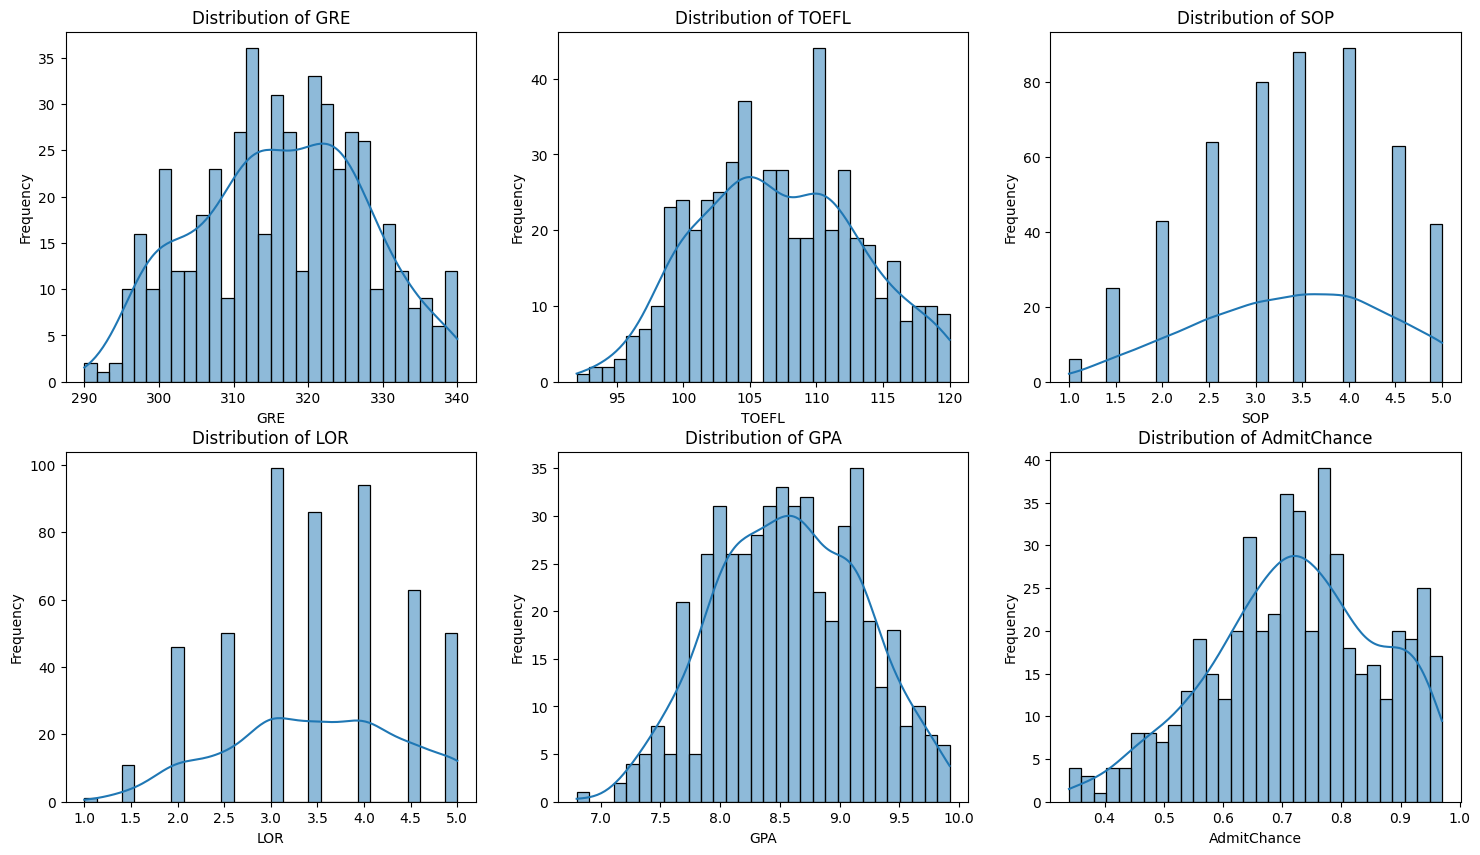

In [ ]:
continuous_vars = ["GRE", "TOEFL", "SOP", "LOR", "GPA", "AdmitChance"]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

By eyeballing the dataset all of them show an approximate normal distribution.

#### Univariate - Categorical

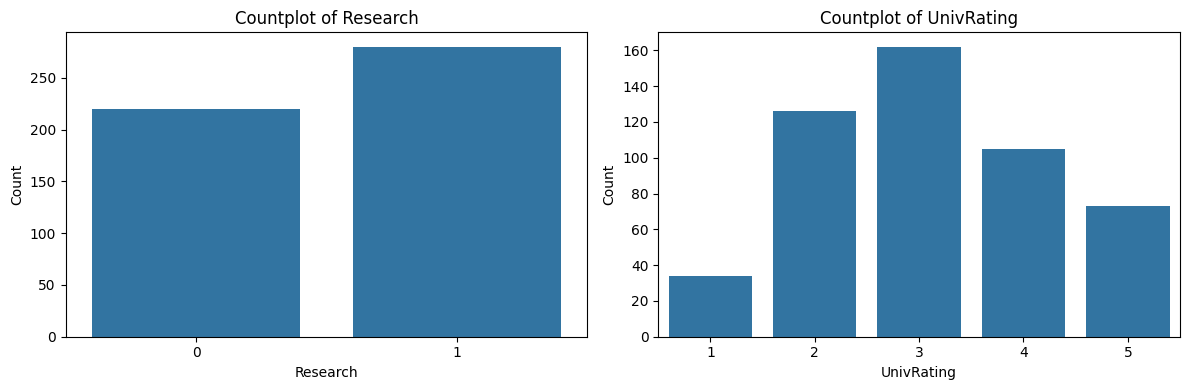

In [ ]:
categorical_vars = ["Research", "UnivRating"]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()

More number of people have done reseach. Also, more universities are ranked 3.

### Bivariate

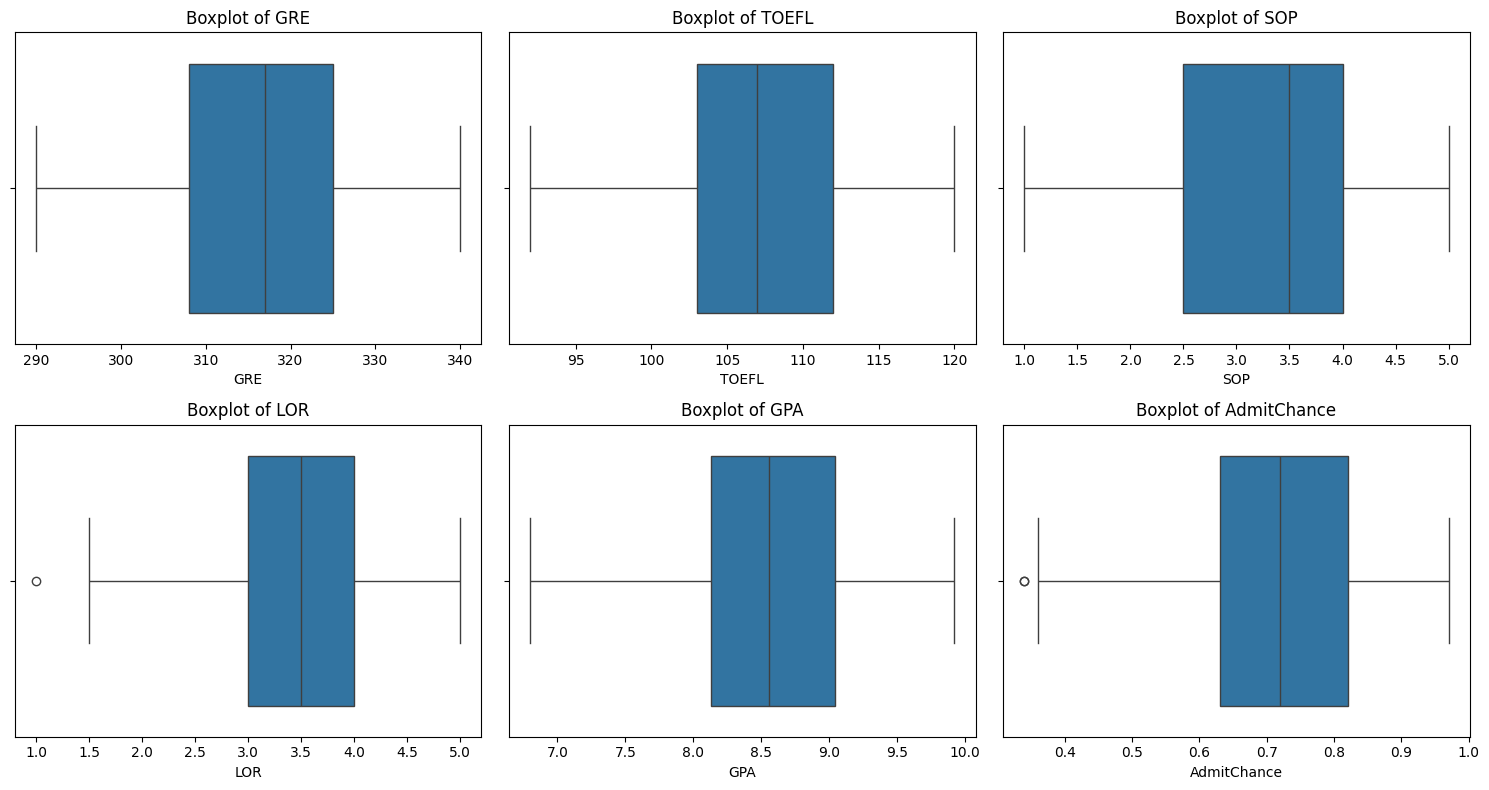

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


We clearly see that only LOR and AdmitChance have outliers. Let see how many values are there.

In [ ]:
print(f" Outliers (values beyond 1.5*IQR)\n")

for col in continuous_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
    print(f" {col}: {outliers.values}")



 Outliers (values beyond 1.5*IQR)

 GRE: []
 TOEFL: []
 SOP: []
 LOR: [1.]
 GPA: []
 AdmitChance: [0.34 0.34]


We observe one outlier in the LOR score and two cases with low admission chances (0.34), all valid and realistic data points rather than errors. Since these points do not significantly impact model performance or residuals, we retain them to preserve real-world variability and avoid bias.

### Multivariate Analysis

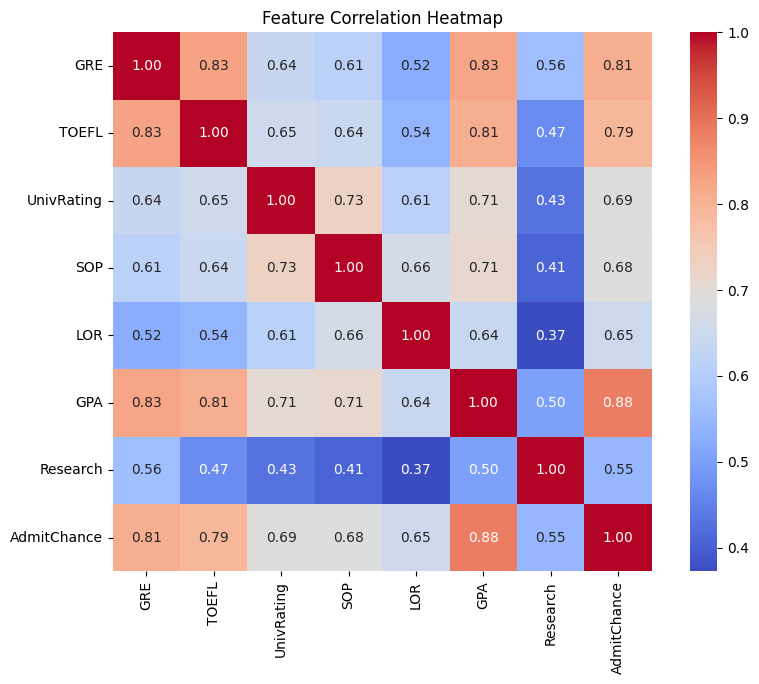

In [ ]:
target_index = df.columns.get_loc("AdmitChance")

corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

We observe a strong positive correlation among TOEFL, GRE, and GPA scores. Generally, a higher CGPA indicates a brighter student who tends to score better on TOEFL and GRE.

Research experience, university ranking, LOR, and SOP show weak or no significant correlations with TOEFL or GRE scores.

There is a moderate relationship between GPA and university rating, as well as between GPA and SOP. This suggests that universities with higher rankings may prefer students with higher CGPA, and students with strong SOPs often have better CGPAs.

Research experience appears largely independent, showing little correlation with other features.

However, the significance of these correlations is unclear. Therefore, we will standardize the variables and apply Variance Inflation Factor (VIF) analysis to assess multicollinearity.

# Feature Engineering

Scaling all the independent variables to have zero mean and unit variance so that they are all on same scale for further analysis

In [ ]:
X = df.drop(columns=['AdmitChance'])
y = df['AdmitChance']
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

## Handling Multicolinearity

In [ ]:
X_scaled_const = sm.add_constant(X_scaled)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_const.values, i) for i in range(X_scaled_const.shape[1])]

print(vif_data)

      Feature       VIF
0       const  1.000000
1         GRE  4.464249
2       TOEFL  3.904213
3  UnivRating  2.621036
4         SOP  2.835210
5         LOR  2.033555
6         GPA  4.777992
7    Research  1.494008


All VIFs are less than 5 so multicolinearity is not significant. We can proceed as it is.

## Feature Engineering Summary

- Dropped the 'Serial No.' column as it does not provide predictive value.
- Renamed columns for clarity and ease of analysis (e.g., 'GRE Scores (out of 340)' to 'GRE').
- Treated categorical variables:
  - 'UnivRating' is ordinal and used as-is.
  - 'Research' is binary (0 or 1) and used without encoding.
- Standardized all numerical features using StandardScaler to bring them to the same scale.
- Removed 'SOP' feature due to high p-value and no significant contribution to model performance.
- Retained 'UnivRating' despite high p-value as it showed slight improvement in model accuracy.
- Checked for multicollinearity using VIF; all features had VIF < 5, indicating no strong multicollinearity.
- Did not create interaction terms or polynomial features to maintain model simplicity.


#Model Creation

We split the data into 80% training and 20% testing sets to train the model without exposure to the test data, ensuring an unbiased evaluation of its performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=True, random_state=42
)


We build a regression model using all available features.

In [ ]:
X_train_0 = sm.add_constant(X_train)
model_0 = sm.OLS(y_train.values, X_train_0).fit()
print("Model 0 (All Features) Summary:")
print(model_0.summary())

X_test_0 = sm.add_constant(X_test)
y_pred_0 = model_0.predict(X_test_0)
mse_0 = mean_squared_error(y_test, y_pred_0)
rmse_0 = np.sqrt(mse_0)
r2_0 = r2_score(y_test, y_pred_0)

print(f"\nModel 0 Performance:")
print(f"MSE: {mse_0:.5f}, RMSE: {rmse_0:.5f}, R²: {r2_0:.5f}")

Model 0 (All Features) Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          3.41e-142
Time:                        18:17:26   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.722

We observe that both University Rating and SOP have very high p-values and fall outside the confidence interval, indicating minimal impact on the model (only 0.0029 and 0.0018, respectively). Therefore, we can safely omit these features. To do this systematically, we first remove SOP and evaluate the model before considering further omission.

In [ ]:
X_train_1 = X_train.drop(columns='SOP')
X_train_1_const = sm.add_constant(X_train_1)
model_1 = sm.OLS(y_train.values, X_train_1_const).fit()
print("\nModel 1 (Excluding SOP) Summary:")
print(model_1.summary())

X_test_1 = X_test.drop(columns='SOP')
X_test_1_const = sm.add_constant(X_test_1)
y_pred_1 = model_1.predict(X_test_1_const)
mse_1 = mean_squared_error(y_test, y_pred_1)
rmse_1 = np.sqrt(mse_1)
r2_1 = r2_score(y_test, y_pred_1)

print(f"\nModel 1 Performance:")
print(f"MSE: {mse_1:.5f}, RMSE: {rmse_1:.5f}, R²: {r2_1:.5f}")



Model 1 (Excluding SOP) Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          2.01e-143
Time:                        18:17:26   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7

In [ ]:
X_train_2 = X_train.drop(columns=['SOP', 'UnivRating'])
X_train_2_const = sm.add_constant(X_train_2)
model_2 = sm.OLS(y_train.values, X_train_2_const).fit()
print("\nModel 2 (Excluding SOP & UnivRating) Summary:")
print(model_2.summary())

X_test_2 = X_test.drop(columns=['SOP', 'UnivRating'])
X_test_2_const = sm.add_constant(X_test_2)
y_pred_2 = model_2.predict(X_test_2_const)
mse_2 = mean_squared_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(y_test, y_pred_2)

print(f"\nModel 2 Performance:")
print(f"MSE: {mse_2:.5f}, RMSE: {rmse_2:.5f}, R²: {r2_2:.5f}")


Model 2 (Excluding SOP & UnivRating) Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          1.36e-144
Time:                        18:17:26   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

##Model Performance Summary


| Index | Model Name | Model                 | MSE     | RMSE    | R2       |
|-------|------------|-----------------------|---------|---------|----------|
| 1     | model0      | All Features          | 0.00370 | 0.06087 | 0.81884  |
| 2     | model1     | Drop SOP              | 0.00371 | 0.06087 | 0.81880  |
| 3     | model2     | Drop SOP & UnivRating | 0.00377 | 0.06142 | 0.81550  |


## Model Selection Using Ockham’s Razor

We apply Ockham’s Razor, favoring the simplest model that maintains strong predictive power without unnecessary complexity:

- The first model, including all features, sets the baseline performance.
- Removing **SOP** (model1) does not meaningfully reduce accuracy, indicating that SOP adds complexity without improving prediction.
- Removing both **SOP** and **University Rating** (model2) causes a noticeable drop in performance, highlighting the importance of University Rating.

Thus, we select **model1** — the simplest model that retains nearly all predictive power by excluding the statistically insignificant SOP feature.

### Additional Insights:

- Although **SOP** has a high p-value and minimal predictive power, it can be safely dropped without loss of accuracy.
- **University Rating** also shows a high p-value but removing it slightly decreases model performance. This suggests that University Rating, while individually weak, likely captures aspects of university prestige or reputation that interact subtly with other factors like GPA and research experience.
- These interactions may not be fully captured by the linear model but are important for understanding admission chances.
*italicized text*

# Assumptions

There are 5 assumptions of Linear Regression.

1.   Assumption of Linearity

2.   No multicolinearity
3. Normal Distribution of Residual
4. Homoscedasticity
5. No Auto correlation




## Assumption of Linearity
All independent variables/features should have linear relationship with target variable.

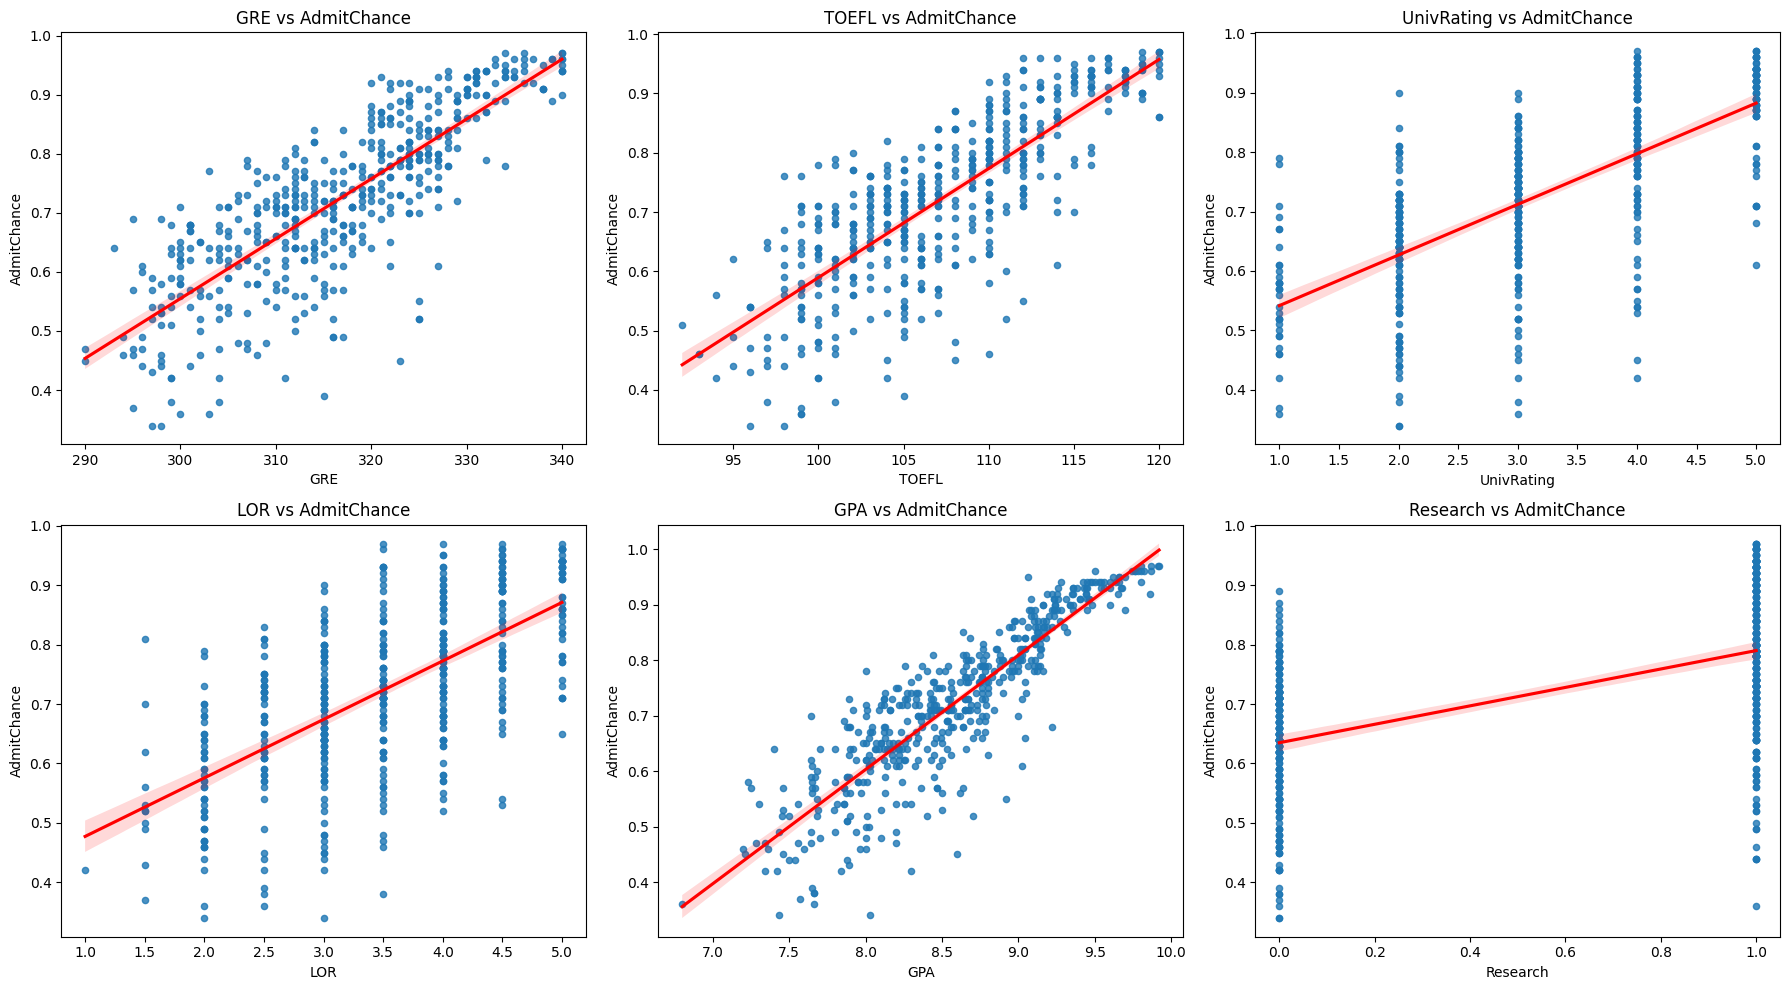

In [ ]:
continuous_vars = ['GRE', 'TOEFL', 'UnivRating', 'LOR', 'GPA', 'Research']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    sns.regplot(x=df[col], y=df['AdmitChance'], ax=axes[i], scatter_kws={"s":20}, line_kws={"color":"red"})
    axes[i].set_title(f'{col} vs AdmitChance')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can clearly see that all the continous variables are in a linear relationship with chance of admission hence our first assuption is met.



## No multicolinearity
We have already tested out second assumption with VIF and since no values were greater than 5 we safely assumed that there is no significant multicolinearity in out dataset.

## Normal Distribution of Residual

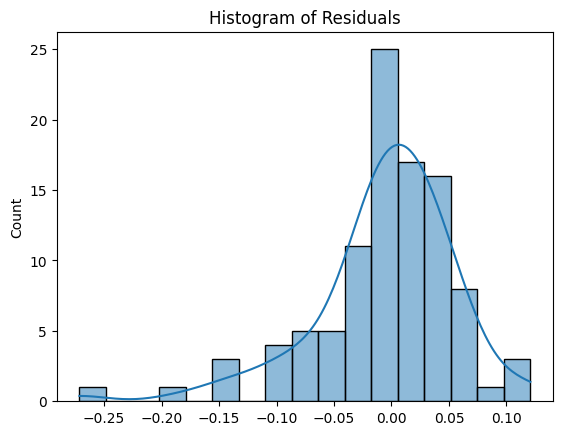

In [ ]:
residuals = y_test - y_pred_model1
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")

plt.show()



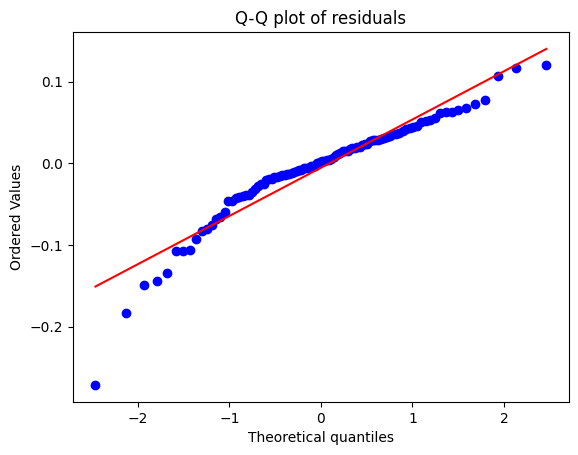

In [ ]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of residuals")
plt.show()


In [ ]:
mean_residual = residuals.mean()
print(f"Mean of residuals: {mean_residual:.6f} (close to zero, satisfies zero-mean assumption)")

if p <= 0.05:
    print("Residuals are not perfectly normal, which may affect confidence intervals and hypothesis tests.")
    print("Potential fixes include applying transformations (e.g., Box-Cox) or using robust regression methods.")
else:
    print("Residuals appear normally distributed, so this assumption is met.")


Mean of residuals: -0.005442 (close to zero, satisfies zero-mean assumption)
Residuals appear normally distributed, so this assumption is met.


In [ ]:
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test: stat={stat:.4f}, p={p:.4f}")
if p > 0.05:
    print("Residuals look normally distributed (fail to reject H0)")
else:
    print("Residuals are not normally distributed (reject H0)")

Shapiro-Wilk Test: stat=0.9201, p=0.0000
Residuals are not normally distributed (reject H0)


We observe that the residuals are not normally distributed. Both the residual mean test and the Shapiro-Wilk test reject the null hypothesis of normality, with the p-value indicating significant deviation. The residual histogram shows noticeable skewness, and the Q-Q plot exhibits points deviating from the diagonal line. As a potential remedy, we tried handling the outliers by removing three records with extreme values. However, this had no significant impact on the residual distribution, suggesting the non-normality might be structural or due to other underlying patterns in the data.



### Handling Residual Normality: Log vs Box-Cox

In [ ]:
from scipy.stats import boxcox

epsilon = 1e-6

y_test_log = np.log(y_test + epsilon)
y_pred_log = np.log(y_pred_model1 + epsilon)
residuals_log = y_test_log - y_pred_log
print(np.mean(residuals_log))
print(shapiro(residuals_log))

y_test_boxcox, lam = boxcox(y_test + epsilon)
y_pred_boxcox, _ = boxcox(y_pred_model1 + epsilon)
residuals_boxcox = y_test_boxcox - y_pred_boxcox
print(np.mean(residuals_boxcox))
print(shapiro(residuals_boxcox))

-0.010967000356874328
ShapiroResult(statistic=np.float64(0.8644257628089564), pvalue=np.float64(4.204610516812592e-08))
0.02628633106499696
ShapiroResult(statistic=np.float64(0.9746549772859705), pvalue=np.float64(0.050705683469852145))



To improve residual normality, we applied log and Box-Cox transformations.

**Log Transformation Results:**  
Mean of residuals: -0.011  
Shapiro-Wilk test p-value: 4.20e-08  
→ Residuals remain non-normal.

**Box-Cox Transformation Results:**  
Mean of residuals: 0.026  
Shapiro-Wilk test p-value: 0.0507  
→ Slight improvement but still marginal.

**Conclusion:**  
Neither transformation normalized residuals adequately.  
Given strong model performance and linear regression’s tolerance to mild non-normality, we proceed without transformation.


## Homoscedasticity

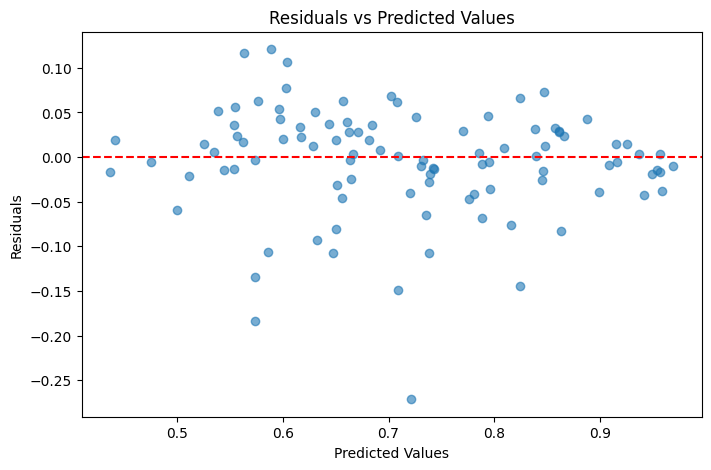

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred_model1, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

The variance against prediction appears to be constant and not changing. We can statistically check it using goldfeldquandt.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_test, X_test)
print(lzip(name, test))

[('F statistic', np.float64(1.2123835550023179)), ('p-value', np.float64(0.2652307987105035))]


Since the p-value is greater than 0.05, we fail to reject the null hypothesis, which means there is no significant relationship between the residual variance and the predicted values. Therefore, the data satisfies the assumption of homoscedasticity.

## No Auto correlation

 Because the dataset does not involve time series data and there is no explicit indication of temporal ordering, it appears there is no auto correlation in dataset. Statistical Validation of auto corelation:

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw:.4f}')

Durbin-Watson statistic: 2.2338


The Durbin-Watson statistic is 2.2338, which is close to 2, indicating little to no autocorrelation in the residuals. Values around 2 suggest independence, so we can safely assume the data does not violate the no-autocorrelation assumption.

# Regularization

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge()
param_grid = {'alpha': np.logspace(-4, 1, 50)}

ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train_1, y_train)

print(f"Best alpha for Ridge: {ridge_cv.best_params_['alpha']:.6f}")

y_pred_ridge = ridge_cv.predict(X_test_1)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MSE: {mse_ridge:.5f}")
print(f"RMSE: {rmse_ridge:.5f}")
print(f"R²: {r2_ridge:.5f}")


Best alpha for Ridge: 7.906043
MSE: 0.00371
RMSE: 0.06093
R²: 0.81844


In [ ]:
from sklearn.linear_model import LassoCV

X_train_1 = X_train.drop(columns=['SOP'])
X_test_1 = X_test.drop(columns=['SOP'])

lasso_cv = LassoCV(alphas=np.linspace(0.001, 0.1, 50), cv=5)
lasso_cv.fit(X_train_1, y_train)

print(f"Best alpha for Lasso (Model 1): {lasso_cv.alpha_:.4f}")

y_pred_lasso = lasso_cv.predict(X_test_1)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MSE: {mse_lasso:.5f}")
print(f"RMSE: {rmse_lasso:.5f}")
print(f"R²: {r2_lasso:.5f}")


Best alpha for Lasso (Model 1): 0.0010
MSE: 0.00370
RMSE: 0.06080
R²: 0.81922


## Choosing Lasso vs Ridge Regression

- **Lasso Regression** with an optimized alpha of 0.001 slightly improves the model’s R² from 0.8188 to 0.8192, indicating a modest gain in predictive accuracy.
- This improvement suggests Lasso’s ability to reduce less important features helps refine the model.
- **Lasso** applies **L1 regularization**, which can shrink some coefficients exactly to zero, effectively performing feature selection and producing a simpler, more interpretable model with less overfitting.
- This sparsity helps improve R² slightly by removing noise or less relevant features.

- In contrast, **Ridge Regression** applies **L2 regularization**, which shrinks coefficients but does not zero them out.
- Ridge reduces coefficient magnitude but retains all features, so it may not improve R² as much if all features have some predictive power.
- Therefore, Ridge shows minimal change in R² compared to Lasso in this case.

**Summary:**  
Lasso provides a better fit by promoting sparsity and reducing overfitting, whereas Ridge provides coefficient shrinkage without feature elimination.


GRE           0.027232
TOEFL         0.018163
UnivRating    0.003268
LOR           0.015851
GPA           0.068571
Research      0.011387
dtype: float64


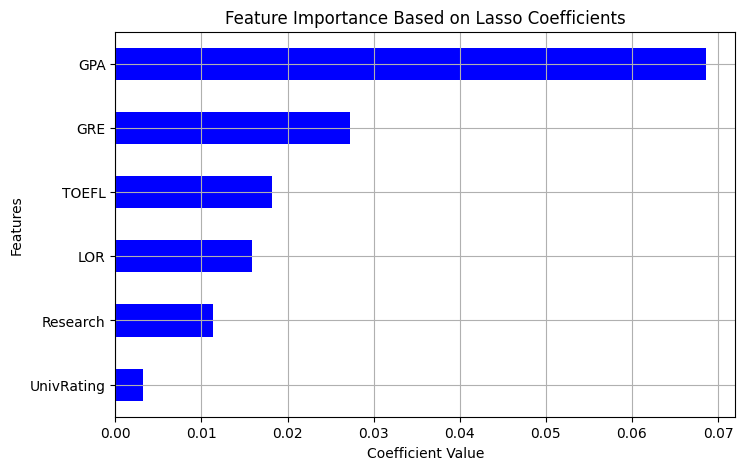

In [ ]:
coefficients = pd.Series(lasso_best.coef_, index=X_train_model1.columns)
print(coefficients)

coefficients = pd.Series(lasso_best.coef_, index=X_train_1.columns).sort_values()

plt.figure(figsize=(8, 5))
coefficients.plot(kind='barh', color='blue')
plt.title('Feature Importance Based on Lasso Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()


## Cross validation

In [ ]:
from sklearn.model_selection import cross_validate

X_model1 = X_scaled.drop(columns=['SOP'])
y_model1 = y

linreg = LinearRegression()

scoring = ['r2', 'neg_mean_squared_error']

cv_results = cross_validate(linreg, X_model1, y_model1, cv=5, scoring=scoring, return_train_score=False)

r2_scores = cv_results['test_r2']
mse_scores = -cv_results['test_neg_mean_squared_error']  # neg_mean_squared_error is negative, so convert back

rmse_scores = np.sqrt(mse_scores)

print("R² scores for each fold:", r2_scores)
print("Average R² score:", r2_scores.mean())
print("MSE scores for each fold:", mse_scores)
print("Average MSE score:", mse_scores.mean())
print("RMSE scores for each fold:", rmse_scores)
print("Average RMSE score:", rmse_scores.mean())


R² scores for each fold: [0.68953578 0.79406102 0.86427996 0.81927493 0.90158458]
Average R² score: 0.8137472528076822
MSE scores for each fold: [0.00944393 0.003093   0.00169704 0.00343988 0.00178342]
Average MSE score: 0.003891454789755341
RMSE scores for each fold: [0.0971799  0.05561472 0.04119519 0.05865052 0.04223051]
Average RMSE score: 0.058974168869233054


Cross-validation indicates that the model is robust and stable, as the average R² across folds closely matches the R² of the overall model, confirming consistent predictive performance

The selected model balances predictive accuracy and simplicity by excluding SOP, a statistically insignificant feature. This streamlined model helps counselors and prospective students understand the key factors impacting admission chances without unnecessary complexity. Simplified models are easier to interpret and communicate, which is critical in admissions counseling where clear, actionable insights are valued. This approach enhances trust in the model’s predictions and supports data-driven decision-making for applicants aiming to improve their profiles effectively.

#Model Performance Evaluation

## Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error

def regression_metrics(X, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return mse, rmse, mae, r2, adjusted_r2

y_pred_train = lasso_cv.predict(X_train_1)

mse_train, rmse_train, mae_train, r2_train, adj_r2_train = regression_metrics(X_train_1, y_train, y_pred_train)
mse_test, rmse_test, mae_test, r2_test, adj_r2_test = regression_metrics(X_test_1, y_test, y_pred_lasso)

print("Train Performance:")
print(f"MSE: {mse_train:.5f}, RMSE: {rmse_train:.5f}, MAE: {mae_train:.5f}, R²: {r2_train:.5f}, Adjusted R²: {adj_r2_train:.5f}")

print("\nTest Performance:")
print(f"MSE: {mse_test:.5f}, RMSE: {rmse_test:.5f}, MAE: {mae_test:.5f}, R²: {r2_test:.5f}, Adjusted R²: {adj_r2_test:.5f}")


Train Performance:
MSE: 0.00353, RMSE: 0.05941, MAE: 0.04249, R²: 0.82092, Adjusted R²: 0.81819

Test Performance:
MSE: 0.00370, RMSE: 0.06080, MAE: 0.04247, R²: 0.81922, Adjusted R²: 0.80755


We observe that our model performs consistently well on both training and test datasets. The MSE and RMSE values are close—0.00353 and 0.00370 respectively—showing that the model generalizes effectively without overfitting. The MAE values are also very similar—0.04249 for training and 0.04247 for testing—indicating that the average absolute prediction error is low and consistent across datasets.

The R² values are around 0.82 for both sets, meaning the model explains approximately 82% of the variance in admission chances. The adjusted R² values also remain high, indicating that our predictors contribute meaningfully without adding noise.

The small gap between train and test metrics, including MAE, confirms model stability. Since the performance holds well across datasets, we don’t see an immediate need for tuning. Still, we can consider adding interaction terms or testing non-linear models to push accuracy further if required.

##Probability Equation from best model


$$
\text{AdmitChance} = b_0 + 0.0272 \times \text{GRE} + 0.0182 \times \text{TOEFL} + 0.0033 \times \text{UnivRating} + 0.0159 \times \text{LOR} + 0.0686 \times \text{GPA} + 0.0114 \times \text{Research}
$$


## Interpretation

- **GRE:** Each unit increase in GRE score increases the admission chance by 0.0272, holding other variables constant.
- **TOEFL:** Each unit increase in TOEFL score increases the admission chance by 0.0182.
- **University Rating:** Slight positive effect; a unit increase raises admission chance by 0.0033.
- **LOR:** Each unit increase in Letter of Recommendation strength increases admission chance by 0.0159.
- **GPA:** The strongest factor; each unit increase in GPA raises admission chance by 0.0686.
- **Research:** Having research experience increases admission chance by approximately 0.0114.

**Summary:**  
GPA and GRE are the most influential predictors for admission chances, with TOEFL and LOR also contributing positively. University Rating and Research have smaller but meaningful effects.


# Insights & Recommendations


## Key Insights

1. **GPA is the Strongest Predictor**  
   Among all features, undergraduate GPA has the highest positive impact on admission probability. Even a small improvement in GPA significantly boosts the likelihood of acceptance.

2. **GRE and TOEFL Matter, But Are Secondary to GPA**  
   GRE and TOEFL scores also positively influence admission chances. However, their relative impact is lower than GPA, especially in tightly competitive Ivy League programs.

3. **Research Experience Offers a Slight Edge**  
   Having prior research experience increases admission chances marginally. While not a dominant factor, it can tip the balance for borderline profiles.

4. **SOP and LOR Have Limited Predictive Power**  
   Statement of Purpose and Letter of Recommendation strength showed weak statistical significance. They may still matter qualitatively, but quantitatively they contribute little to the model's predictions.

5. **University Rating Holds Subtle Influence**  
   Although statistically weak in isolation, University Rating slightly improves model performance. This suggests applicants from more reputed institutions might receive marginal preference.

## Business Recommendations

1. **Prioritize GPA-Focused Guidance**  
   Emphasize long-term academic performance for students still in college. Consider introducing GPA improvement workshops, grade-targeted mentoring, or structured academic planning.

2. **Optimize Test Prep for ROI**  
   While GRE and TOEFL scores do contribute, ensure that Jamboree's test-prep services are efficient and ROI-driven. Offer personalized coaching only where it can make a material difference.

3. **Promote Research-Based Programs**  
   Encourage students to seek internships or assistantships that include research components. Help them frame this experience well in applications even if it’s short-term.

4. **Simplify SOP/LOR Support Offerings**  
   Since these features have limited quantitative impact, offer them as lightweight, template-based services rather than intensive workshops — focusing more on quality over quantity.

5. **Target College Partnerships**  
   Build university-level tie-ups or reputation enhancement initiatives with institutions that have higher University Ratings. This could improve applicant profiles indirectly.

6. **Deploy the Model as a Public Tool**  
   Consider embedding this model on Jamboree’s website as a **“Chance Predictor”**. Make it interactive, and guide users to counseling services based on their results.

7. **Use Interpretability for Counseling**  
   Equip counselors with clear feature impact insights (like GPA vs GRE sensitivity), so they can provide **data-backed, personalized advice** to students.


# Further Improvements and Next Steps for the Model

- **Feature Engineering:**  
  Explore creating new features or interaction terms (e.g., GRE × Research experience) to capture nonlinear or combined effects that may improve predictive power.

- **Nonlinear Models:**  
  Try more complex models such as Random Forest, Gradient Boosting, or Support Vector Regression that can capture nonlinear relationships and interactions missed by linear regression.

- **Polynomial Regression:**  
  Incorporate polynomial or spline terms for variables where the linearity assumption may not hold perfectly, improving model flexibility.

- **Outlier Treatment:**  
  Investigate the impact of outliers more rigorously and try robust regression techniques or transformations to improve residual normality and overall model fit.

- **Regularization Tuning:**  
  Further fine-tune hyperparameters for Lasso, Ridge, or ElasticNet using larger search spaces or Bayesian optimization for better generalization.

- **Model Interpretation Tools:**  
  Use SHAP or LIME to better explain model predictions and understand feature importance at individual prediction levels.

- **Cross-validation and Bootstrapping:**  
  Apply more robust validation techniques like repeated k-fold cross-validation or bootstrapping to better estimate model performance and uncertainty.

- **Incorporate Additional Data:**  
  Include more applicant profile information (e.g., extracurriculars, letters of recommendation text analysis, interview scores) if available, to enrich predictive capability.

- **Calibration and Probability Estimation:**  
  If framing as a classification or probability prediction problem, calibrate predicted probabilities for better decision-making thresholds.

- **Deploy Model with Feedback Loop:**  
  Deploy the model in a real-world setting with continuous feedback to iteratively improve it based on actual admission outcomes.

These steps can help improve predictive accuracy, model robustness, interpretability, and ultimately, the value of the admissions counseling tool.
